In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Carregar as bases em DataFrames
interrupcoes = pd.read_excel('interrupcoes-energia-eletrica-2023.xlsx')
iasc = pd.read_excel('indice-satisfacao-consumidor.xlsx')
ouvidoria = pd.read_excel('ouvidoria-aneel-2023.xlsx')
reclamacoes = pd.read_excel('reclamacoes-n1e2-distribuidoras-2023.xlsx')

# Exibir as primeiras linhas de cada base para validação
print("Interrupções:")
print(interrupcoes.head())

print("\nIASC:")
print(iasc.head())

print("\nOuvidoria:")
print(ouvidoria.head())

print("\nReclamações:")
print(reclamacoes.head())


Interrupções:
   DatGeracaoConjuntoDados DscConjuntoUnidadeConsumidora DscTipoInterrupcao  \
0                  45545.0                 São Francisco     Não Programada   
1                  45545.0                 São Francisco     Não Programada   
2                  45545.0               Cruzeiro do Sul     Não Programada   
3                  45545.0                Epitaciolândia     Não Programada   
4                  45545.0                       TAQUARI     Não Programada   

   IdeMotivoInterrupcao DatInicioInterrupcao   DatFimInterrupcao  \
0                   0.0  2023-01-01 00:16:34 2023-01-01 02:25:00   
1                   0.0  2023-02-17 18:23:00 2023-02-17 23:30:23   
2                   0.0  2023-03-30 10:27:00 2023-03-30 12:46:50   
3                   0.0  2023-05-13 12:55:00 2023-05-13 23:45:00   
4                   1.0  2023-07-11 23:05:56 2023-07-12 06:44:09   

                           DscFatoGeradorInterrupcao  NumNivelTensao  \
0  INTERNA - NAO PROGRAMADA - 

In [ ]:
# Converter colunas de data para o formato datetime
interrupcoes['DatInicioInterrupcao'] = pd.to_datetime(interrupcoes['DatInicioInterrupcao'])
interrupcoes['DatFimInterrupcao'] = pd.to_datetime(interrupcoes['DatFimInterrupcao'])

# Calcular a duração da interrupção em minutos
interrupcoes['DuracaoMinutos'] = (interrupcoes['DatFimInterrupcao'] - interrupcoes['DatInicioInterrupcao']).dt.total_seconds() / 60

# Validar o resultado
print("\nInterrupções com duração calculada:")
print(interrupcoes[['DatInicioInterrupcao', 'DatFimInterrupcao', 'DuracaoMinutos']].head())



Interrupções com duração calculada:
  DatInicioInterrupcao   DatFimInterrupcao  DuracaoMinutos
0  2023-01-01 00:16:34 2023-01-01 02:25:00      128.433333
1  2023-02-17 18:23:00 2023-02-17 23:30:23      307.383333
2  2023-03-30 10:27:00 2023-03-30 12:46:50      139.833333
3  2023-05-13 12:55:00 2023-05-13 23:45:00      650.000000
4  2023-07-11 23:05:56 2023-07-12 06:44:09      458.216667



Frequência por tipo de interrupção:
DscTipoInterrupcao
Não Programada    1027477
Programada          21071
Name: count, dtype: int64


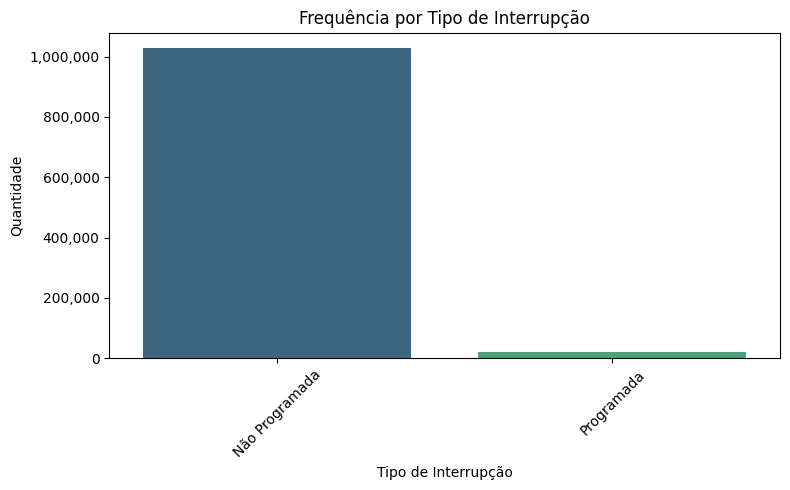

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


# Contar interrupções por tipo
freq_tipo = interrupcoes['DscTipoInterrupcao'].value_counts()

# Exibir o resultado
print("\nFrequência por tipo de interrupção:")
print(freq_tipo)

# Visualizar em gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=freq_tipo.index, y=freq_tipo.values, palette='viridis', hue=freq_tipo.index, dodge=False)

# Ajustar o formato do eixo Y para exibir valores em milhares (k) ou milhões (M)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Títulos e rótulos
plt.title('Frequência por Tipo de Interrupção')
plt.xlabel('Tipo de Interrupção')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Remove a legenda
plt.tight_layout()

# Mostrar o gráfico
plt.show()



Duração média por município (Top 10):
DscConjuntoUnidadeConsumidora
PARAISO I NÃO URBANO    1133.324063
BARREIRINHAS            1095.471224
UHE ISAMU IKEDA         1077.529205
Cristalandia            1062.490530
Pedro Afonso            1022.055913
MIRANORTE                993.224892
GUARAI II                944.846577
Lagoa da Confusao        923.912516
MONTE DO CARMO           899.920470
NOVA ROSALANDIA          884.001294
Name: DuracaoMinutos, dtype: float64


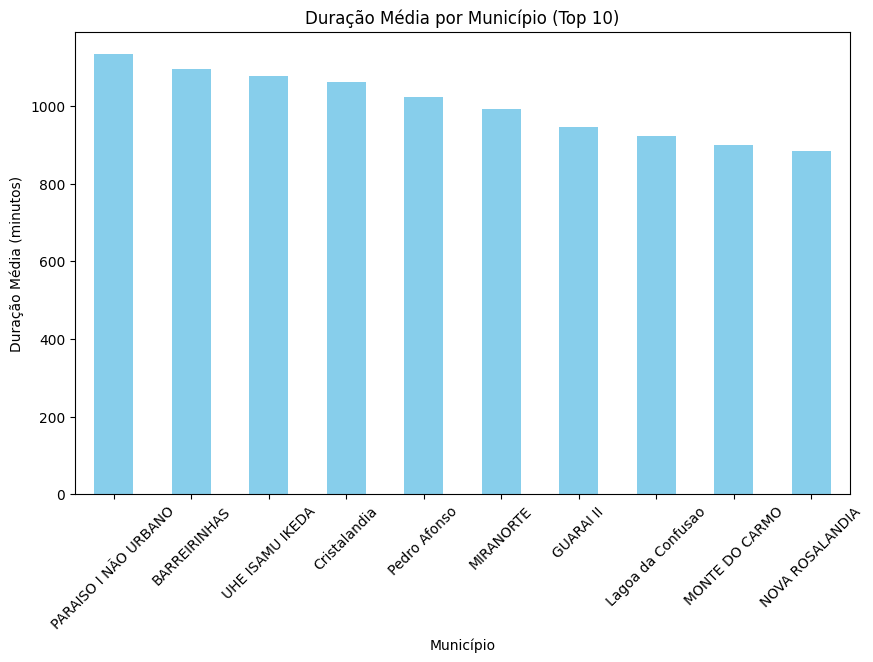

In [ ]:
# Duração média por município
duracao_municipio = interrupcoes.groupby('DscConjuntoUnidadeConsumidora')['DuracaoMinutos'].mean().sort_values(ascending=False)

# Exibir o top 10
print("\nDuração média por município (Top 10):")
print(duracao_municipio.head(10))

# Visualizar em gráfico
plt.figure(figsize=(10, 6))
duracao_municipio.head(10).plot(kind='bar', color='skyblue')
plt.title('Duração Média por Município (Top 10)')
plt.xlabel('Município')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=45)
plt.show()



Principais causas de interrupções (Top 5):
DscFatoGeradorInterrupcao
INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FALHA DE MATERIAL OU EQUIPAMENTO    362588
INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU VEGETACAO                        81209
INTERNA-NAO PROGRAMADA-PROPRIAS DO SISTEMA-FALHA DE MATERIAL OU EQUIPAMENTO     57021
Interna-Não programada-Próprias do sistema-Falha de material ou equipamento     48852
INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;NAO IDENTIFICADA                     43085
Name: count, dtype: int64


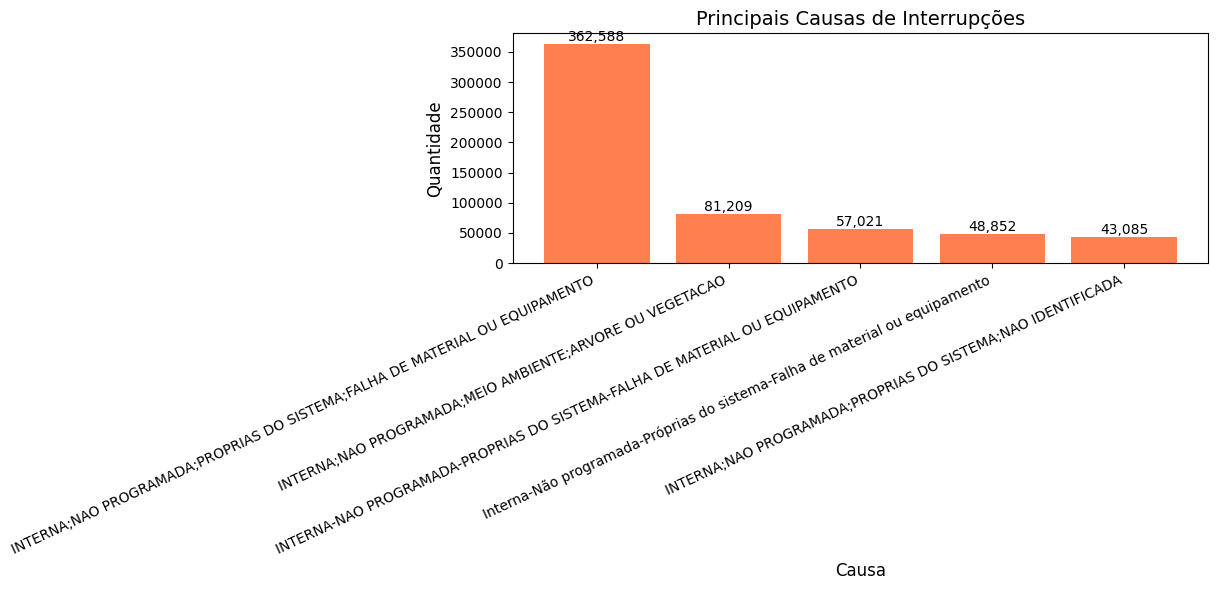

In [ ]:
# Contar causas das interrupções
causas = interrupcoes['DscFatoGeradorInterrupcao'].value_counts()

# Exibir o top 5
print("\nPrincipais causas de interrupções (Top 5):")
print(causas.head(5))

# Visualizar em gráfico
plt.figure(figsize=(12, 6))

# Plotar as barras manualmente
bars = plt.bar(causas.head(5).index, causas.head(5).values, color='coral')

# Adicionar rótulos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.title('Principais Causas de Interrupções', fontsize=14)
plt.xlabel('Causa', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=25, fontsize=10, ha='right')  # Inclinar e alinhar os rótulos
plt.tight_layout()

# Mostrar o gráfico
plt.show()


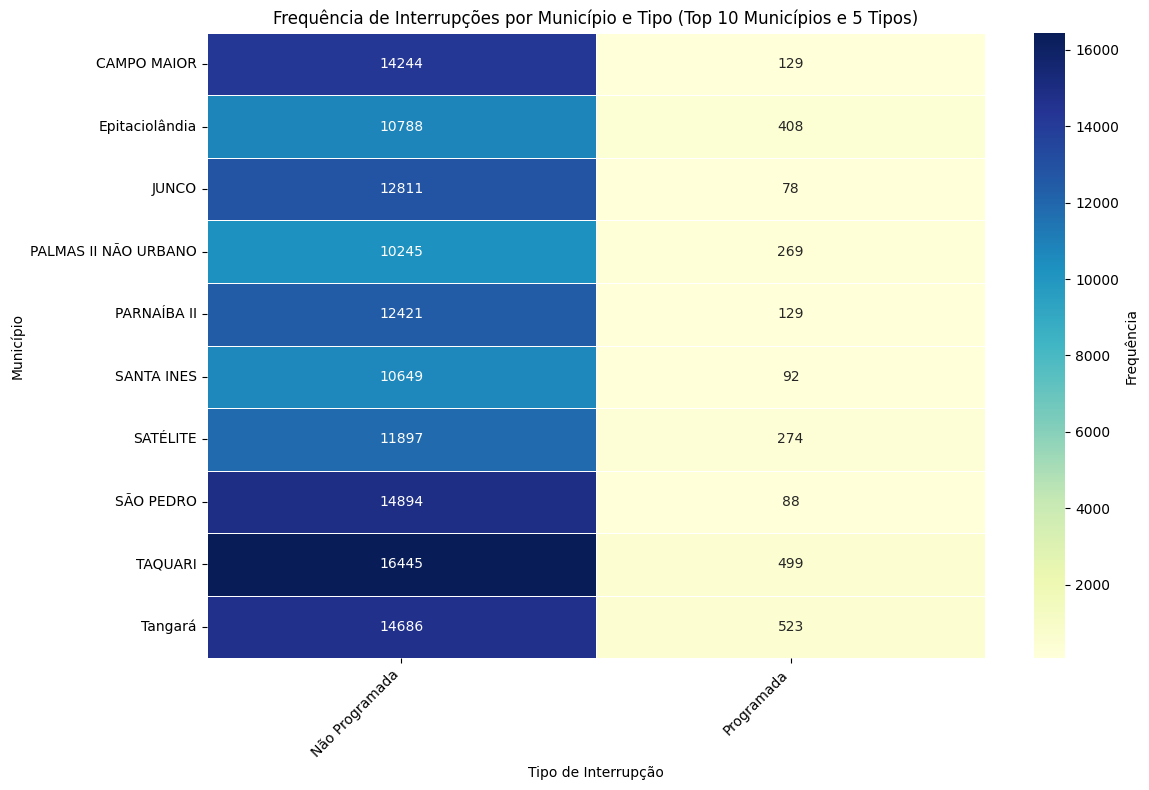

In [ ]:
# Selecionar os 10 municípios com mais interrupções
top_municipios = interrupcoes['DscConjuntoUnidadeConsumidora'].value_counts().head(10).index

# Selecionar as 5 interrupções mais frequentes
top_interrupcoes = interrupcoes['DscTipoInterrupcao'].value_counts().head(5).index

# Criar a tabela cruzada de frequência de interrupções por município e tipo
heatmap_data = interrupcoes[interrupcoes['DscConjuntoUnidadeConsumidora'].isin(top_municipios) &
                            interrupcoes['DscTipoInterrupcao'].isin(top_interrupcoes)] \
                            .pivot_table(index='DscConjuntoUnidadeConsumidora',
                                         columns='DscTipoInterrupcao',
                                         values='NumUnidadeConsumidora',
                                         aggfunc='count',
                                         fill_value=0)

# Visualizar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Frequência'})
plt.title('Frequência de Interrupções por Município e Tipo (Top 10 Municípios e 5 Tipos)')
plt.xlabel('Tipo de Interrupção')
plt.ylabel('Município')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Total de interrupções por município e tipo (Top 10 municípios):
DscTipoInterrupcao             Não Programada  Programada
DscConjuntoUnidadeConsumidora                            
TAQUARI                                 16445         499
Tangará                                 14686         523
SÃO PEDRO                               14894          88
CAMPO MAIOR                             14244         129
JUNCO                                   12811          78
PARNAÍBA II                             12421         129
SATÉLITE                                11897         274
Epitaciolândia                          10788         408
SANTA INES                              10649          92
PALMAS II NÃO URBANO                    10245         269


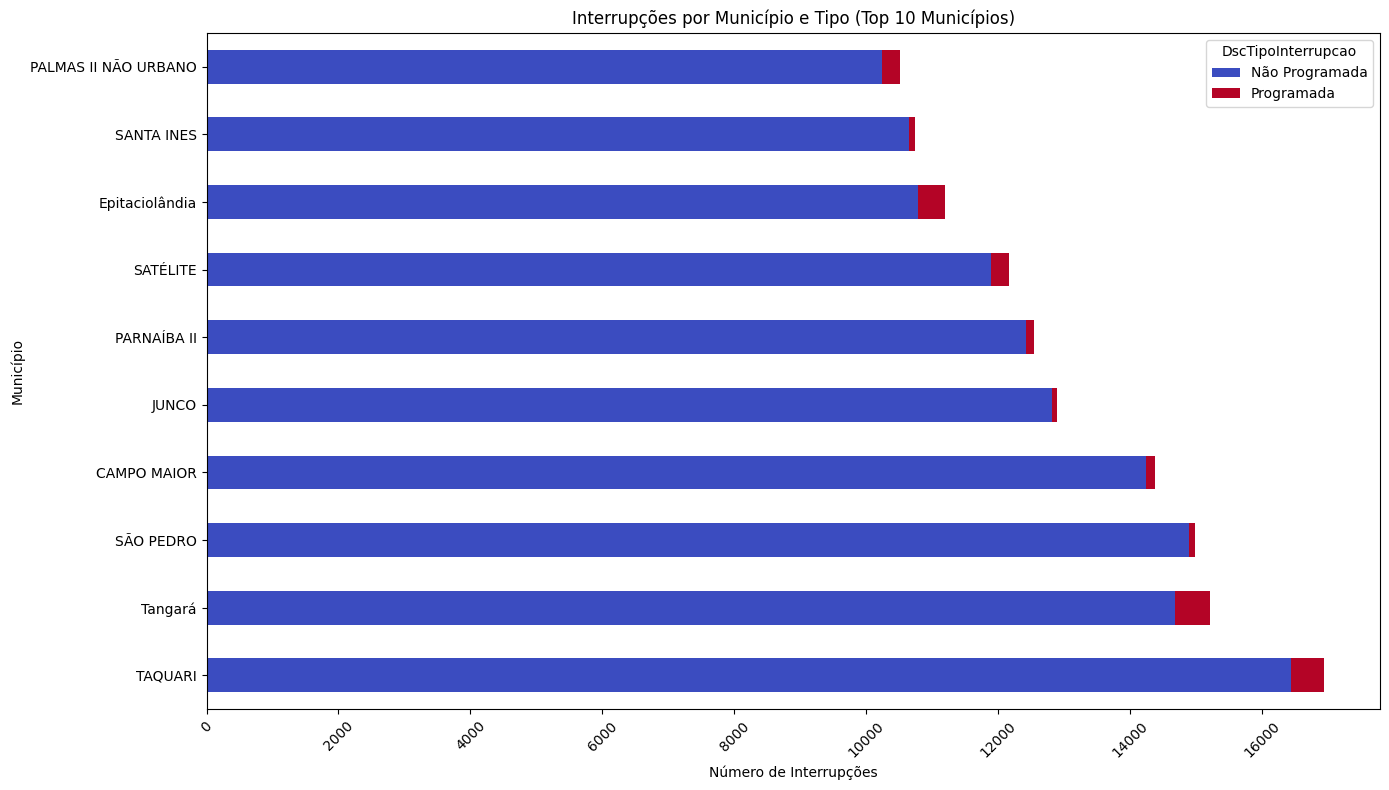

In [ ]:
# Contar o total de interrupções por município e tipo
interrupcoes_municipio_tipo = interrupcoes.groupby(['DscConjuntoUnidadeConsumidora', 'DscTipoInterrupcao']).size().unstack(fill_value=0)

# Selecionar os 10 municípios com mais interrupções
top_municipios = interrupcoes_municipio_tipo.sum(axis=1).nlargest(10).index
top_municipios_data = interrupcoes_municipio_tipo.loc[top_municipios]

# Exibir os resultados no formato legível
print("Total de interrupções por município e tipo (Top 10 municípios):")
print(top_municipios_data)

# Plotar um gráfico de barras horizontais para os 10 municípios com mais interrupções
top_municipios_data.plot(kind='barh', stacked=True, figsize=(14, 8), cmap='coolwarm')

plt.title('Interrupções por Município e Tipo (Top 10 Municípios)')
plt.xlabel('Número de Interrupções')
plt.ylabel('Município')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


              Município  Interrupções Não Programadas  \
0               TAQUARI                         16445   
1               Tangará                         14686   
2             SÃO PEDRO                         14894   
3           CAMPO MAIOR                         14244   
4                 JUNCO                         12811   
5           PARNAÍBA II                         12421   
6        Epitaciolândia                         10788   
7            SANTA INES                         10649   
8  PALMAS II NÃO URBANO                         10245   

   Interrupções Programadas  População  Densidade Não Programada  
0                       499      25198                652.631161  
1                       523      13281               1105.790227  
2                        88      38256                389.324550  
3                       129      45793                311.051907  
4                        78       5146               2489.506413  
5                       129

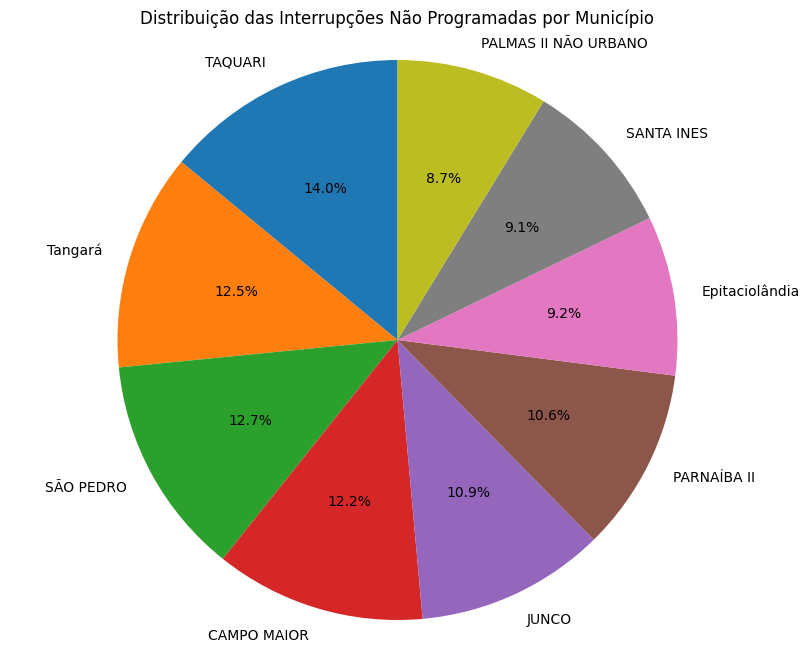

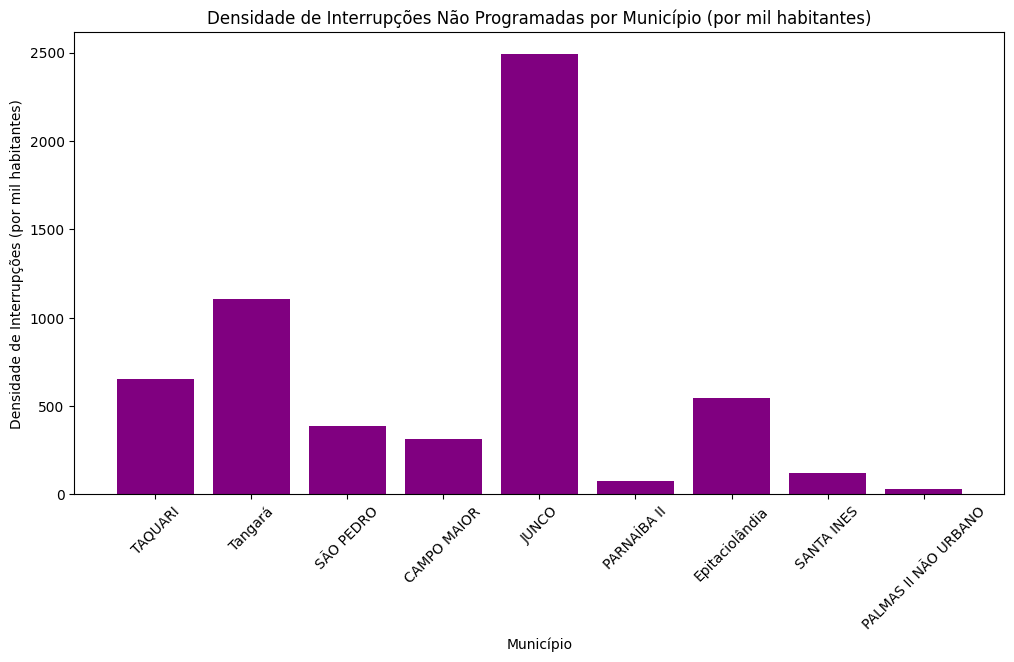

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de dados de interrupções e populações com valores atualizados
dados = {
    'Município': ['TAQUARI', 'Tangará', 'SÃO PEDRO', 'CAMPO MAIOR', 'JUNCO', 'PARNAÍBA II', 'Epitaciolândia', 'SANTA INES', 'PALMAS II NÃO URBANO'],
    'Interrupções Não Programadas': [16445, 14686, 14894, 14244, 12811, 12421, 10788, 10649, 10245],
    'Interrupções Programadas': [499, 523, 88, 129, 78, 129, 408, 92, 269],
    'População': [25198, 13281, 38256, 45793, 5146, 162159, 19739, 89861, 323625]  # População atualizada
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Calcular a densidade de interrupções (não programadas) por mil habitantes
df['Densidade Não Programada'] = df['Interrupções Não Programadas'] / df['População'] * 1000

# Ver o DataFrame com a densidade
print(df)

# Criar gráfico de pizza para visualizar a distribuição das interrupções não programadas
plt.figure(figsize=(10, 8))
plt.pie(df['Interrupções Não Programadas'], labels=df['Município'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Interrupções Não Programadas por Município')
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()

# Gráfico de barras para comparar as interrupções não programadas e a população
plt.figure(figsize=(12, 6))
plt.bar(df['Município'], df['Densidade Não Programada'], color='purple')
plt.title('Densidade de Interrupções Não Programadas por Município (por mil habitantes)')
plt.xlabel('Município')
plt.ylabel('Densidade de Interrupções (por mil habitantes)')
plt.xticks(rotation=45)
plt.show()


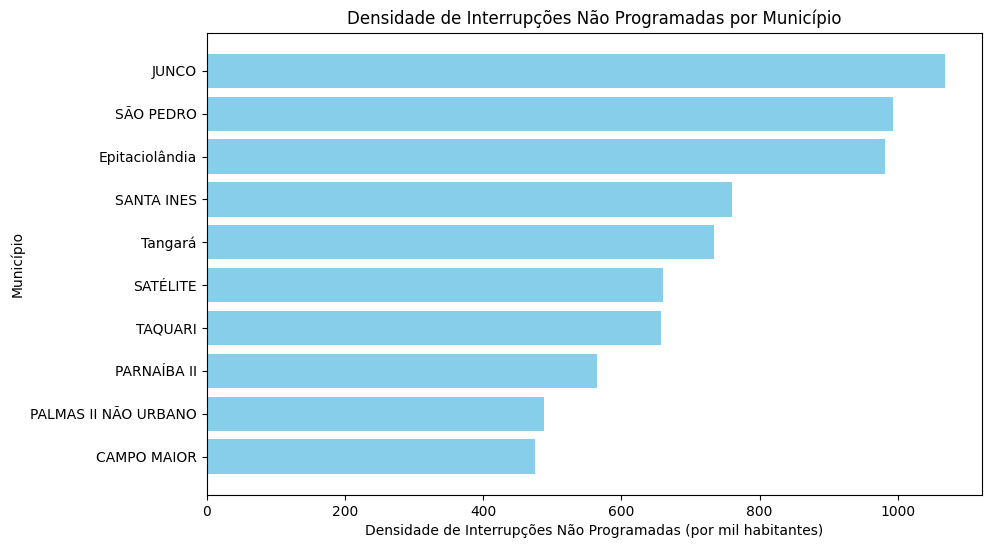

In [ ]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados = {
    'Município': ['TAQUARI', 'Tangará', 'SÃO PEDRO', 'CAMPO MAIOR', 'JUNCO',
                  'PARNAÍBA II', 'SATÉLITE', 'Epitaciolândia', 'SANTA INES',
                  'PALMAS II NÃO URBANO'],
    'Interrupções Não Programadas': [16445, 14686, 14894, 14244, 12811, 12421,
                                     11897, 10788, 10649, 10245],
    'População': [25000, 20000, 15000, 30000, 12000, 22000, 18000, 11000, 14000, 21000],
    'Densidade Não Programada': [657.80, 734.30, 992.93, 474.80, 1067.58,
                                 564.59, 660.94, 980.73, 760.64, 487.86]
}

# Criar DataFrame
import pandas as pd
df = pd.DataFrame(dados)

# Ordenar por densidade não programada para facilitar a visualização
df_sorted = df.sort_values('Densidade Não Programada', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Município'], df_sorted['Densidade Não Programada'], color='skyblue')
plt.xlabel('Densidade de Interrupções Não Programadas (por mil habitantes)')
plt.ylabel('Município')
plt.title('Densidade de Interrupções Não Programadas por Município')
plt.gca().invert_yaxis()  # Inverter para que o maior valor fique no topo
plt.show()



Frequência de interrupções para as 10 cidades com mais interrupções:
Mes                            1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
DscConjuntoUnidadeConsumidora                                                   
TAQUARI                        1340  1282  1686  1748  1245  1113   832  1382   
Tangará                        1144  1122  1522  1535  1288   940   738  1568   
SÃO PEDRO                      1549  1712  1486  1266  1062   913   693   704   
CAMPO MAIOR                    1942  1802  1748  1307   964   851   784   719   
JUNCO                          1215  1333  1168   969   869   761   765   672   
PARNAÍBA II                    1024   816   953   928   803   653   588   740   
SATÉLITE                       1198  1398   999   741   805   674   801   698   
Epitaciolândia                  997   889  1229  1027   740   700   596   910   
SANTA INES                      867  1119   977   984  1014   740   776   777   
PALMAS II NÃO URBANO           1434  12

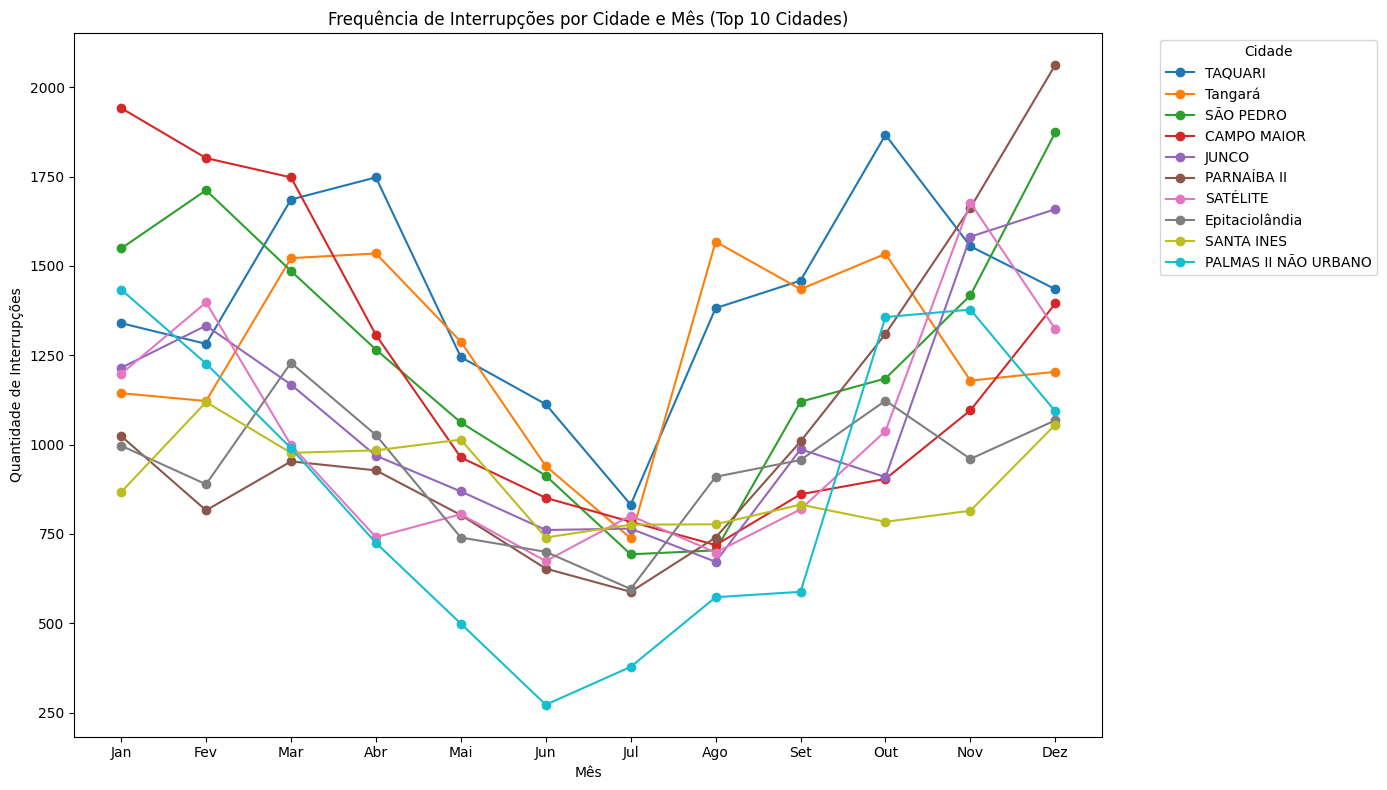

In [ ]:
# Converter a coluna de data para o tipo datetime
interrupcoes['DatInicioInterrupcao'] = pd.to_datetime(interrupcoes['DatInicioInterrupcao'])

# Extrair o mês da data de início
interrupcoes['Mes'] = interrupcoes['DatInicioInterrupcao'].dt.month

# Contar as interrupções por cidade e mês
freq_regiao_mes = interrupcoes.groupby(['DscConjuntoUnidadeConsumidora', 'Mes']).size().unstack(fill_value=0)

# Selecionar as 10 cidades com mais interrupções
top_cidades = freq_regiao_mes.sum(axis=1).nlargest(10).index
freq_regiao_mes_top = freq_regiao_mes.loc[top_cidades]

# Exibir os resultados
print("\nFrequência de interrupções para as 10 cidades com mais interrupções:")
print(freq_regiao_mes_top)

# Visualizar os dados em um gráfico de linha
plt.figure(figsize=(14, 8))
for cidade in freq_regiao_mes_top.index:
    plt.plot(freq_regiao_mes_top.columns, freq_regiao_mes_top.loc[cidade], marker='o', label=cidade)

plt.title('Frequência de Interrupções por Cidade e Mês (Top 10 Cidades)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Interrupções')
plt.xticks(freq_regiao_mes_top.columns, labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Cidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


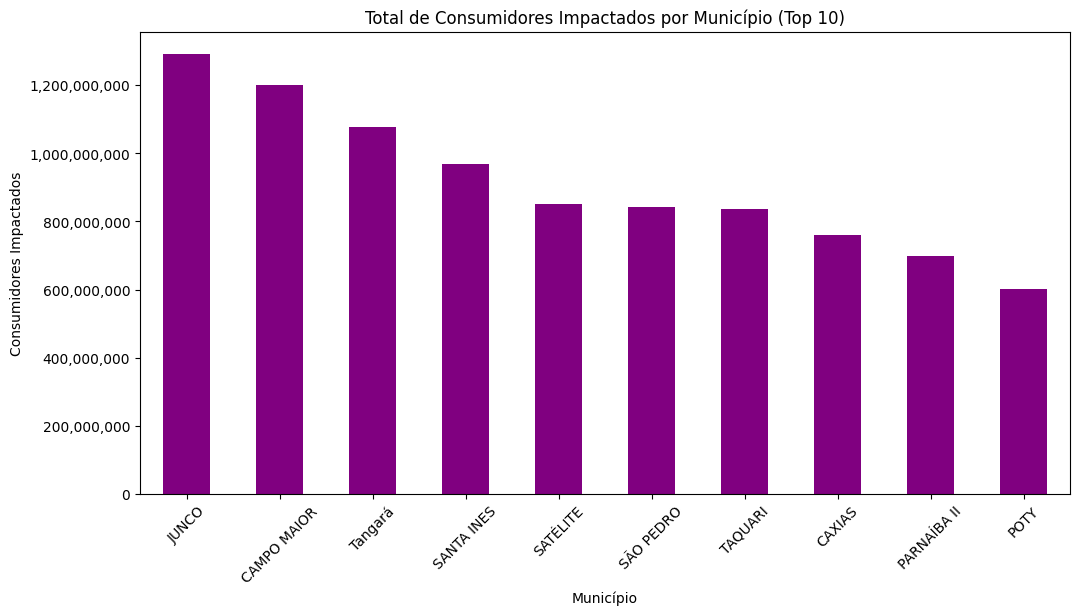


Total de consumidores impactados por município (Top 10):
DscConjuntoUnidadeConsumidora
JUNCO          1,291,363,267
CAMPO MAIOR    1,199,450,590
Tangará        1,077,979,914
SANTA INES       968,901,675
SATÉLITE         852,007,829
SÃO PEDRO        841,610,197
TAQUARI          836,572,504
CAXIAS           761,005,720
PARNAÍBA II      698,062,147
POTY             601,961,106
Name: NumConsumidorConjunto, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Total de consumidores por município
total_consumidores_municipio = interrupcoes.groupby('DscConjuntoUnidadeConsumidora')['NumConsumidorConjunto'].sum()

# Visualizar os dados no gráfico
plt.figure(figsize=(12, 6))
top_10_municipios = total_consumidores_municipio.sort_values(ascending=False).head(10)
top_10_municipios.plot(kind='bar', color='purple')

# Formatar o eixo Y para exibir números reais
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))  # Formatação de número com separador de milhar

# Títulos e labels
plt.title('Total de Consumidores Impactados por Município (Top 10)')
plt.xlabel('Município')
plt.ylabel('Consumidores Impactados')

# Rolar os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

# Exibir os resultados no console com valores reais
print("\nTotal de consumidores impactados por município (Top 10):")
# Usando o método '.apply' para formatar os números de forma mais legível
top_10_municipios_formatted = top_10_municipios.apply(lambda x: f'{x:,.0f}')
print(top_10_municipios_formatted)


In [ ]:
# Salvar os dados tratados em um novo arquivo Excel
interrupcoes.to_excel('interrupcoes_tratadas.xlsx', index=False)

# Exibir insights
print("\nResumo dos insights:")
print(f"- Tipo de interrupção mais frequente: {freq_tipo.idxmax()} ({freq_tipo.max()} ocorrências)")
print(f"- Município com maior duração média: {duracao_municipio.idxmax()} ({duracao_municipio.max():.2f} minutos)")
print(f"- Causa mais comum: {causas.idxmax()} ({causas.max()} ocorrências)")



Resumo dos insights:
- Tipo de interrupção mais frequente: Não Programada (1027477 ocorrências)
- Município com maior duração média: PARAISO I NÃO URBANO (1133.32 minutos)
- Causa mais comum: INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FALHA DE MATERIAL OU EQUIPAMENTO (362588 ocorrências)



Média dos indicadores de Qualidade e Satisfação por Agente Regulador:
                        MdaIndicadorQualidade  MdaIndicadorSatisfacao
SigAgente                                                            
Amazonas Energia                    57.147162               52.758371
CEA                                 47.496923               45.983846
CEA Equatorial                      56.289560               39.947866
CEEE-D                              67.273846               66.320769
CEEE-D Equatorial                   73.116790               58.039997
...                                       ...                     ...
Pacto Energia (Forcel)              88.320504               71.265505
RGE                                 76.389422               66.177952
Roraima Energia                     57.439212               44.794241
Santa Maria                         70.636528               66.066086
Sulgipe                             73.080455               70.600588

[110 rows x 2 colu

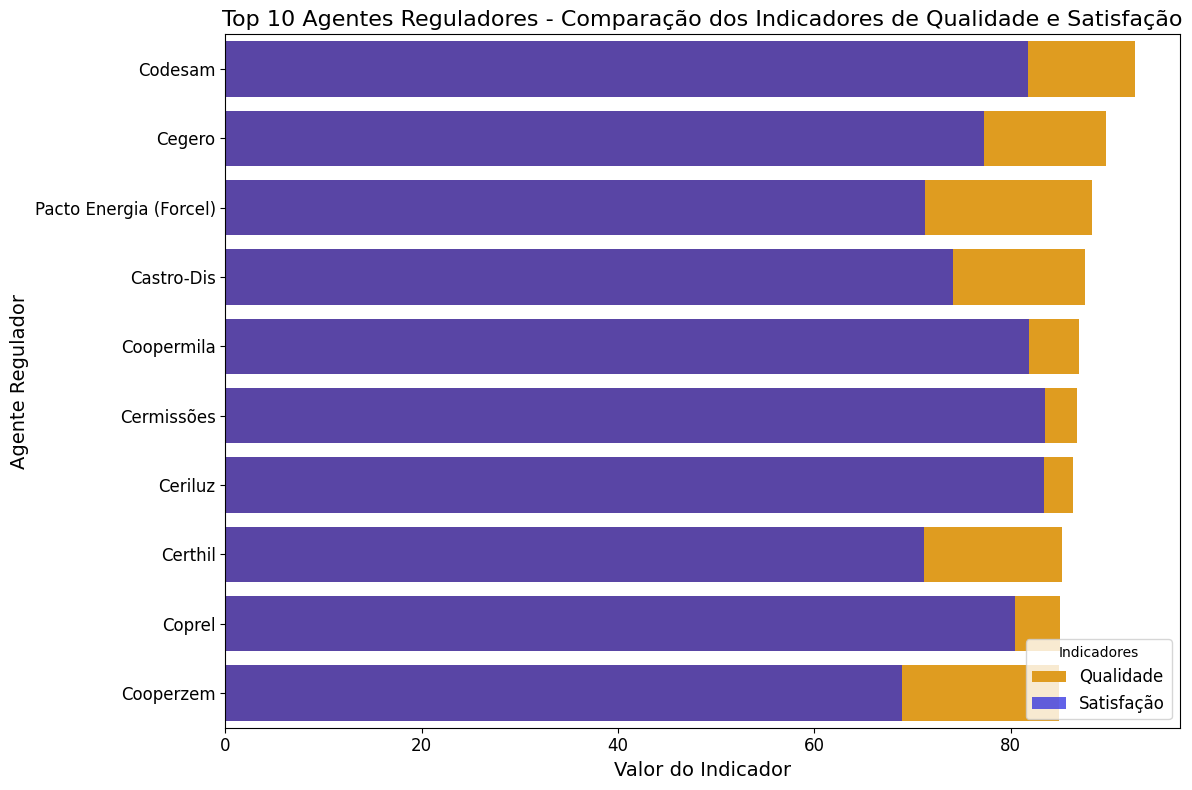

In [ ]:
#Comparação dos Indicadores de Satisfação e Qualidade por Agente Regulador
#top 10 agentes com melhor desempenho em qualidade e satisfação

# Calculando a média dos indicadores para cada agente
iasc_avg = iasc_sorted.groupby('SigAgente')[['MdaIndicadorQualidade', 'MdaIndicadorSatisfacao']].mean()

print("\nMédia dos indicadores de Qualidade e Satisfação por Agente Regulador:")
print(iasc_avg)

# Ordenando os agentes pela média dos indicadores para pegar os top 10
iasc_top10 = iasc_avg.sort_values(by=['MdaIndicadorQualidade', 'MdaIndicadorSatisfacao'], ascending=False).head(10)

print("\nTop 10 Agentes Reguladores por Qualidade e Satisfação:")
print(iasc_top10)

plt.figure(figsize=(12, 8))

# Criando o gráfico de barras horizontais para os top 10 agentes
sns.barplot(x=iasc_top10['MdaIndicadorQualidade'], y=iasc_top10.index, color='orange', label='Qualidade')
sns.barplot(x=iasc_top10['MdaIndicadorSatisfacao'], y=iasc_top10.index, color='blue', label='Satisfação', alpha=0.7)

plt.title('Top 10 Agentes Reguladores - Comparação dos Indicadores de Qualidade e Satisfação', fontsize=16)
plt.xlabel('Valor do Indicador', fontsize=14)
plt.ylabel('Agente Regulador', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionando uma legenda
plt.legend(title='Indicadores', fontsize=12)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


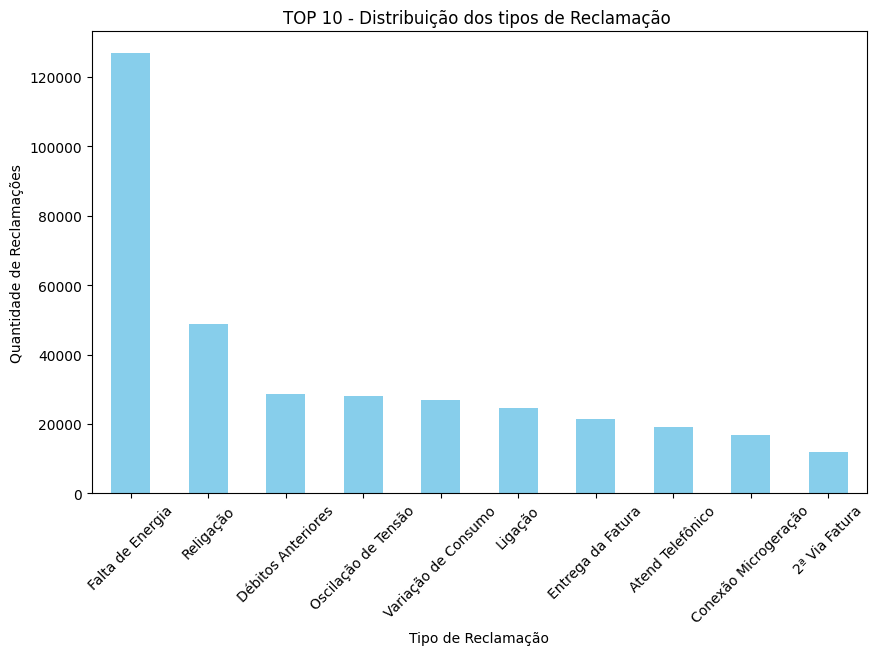

In [ ]:
# Analisando as tipologias de reclamação mais frequentes
tipologias_reclamacao = ouvidoria['NomTipologia'].value_counts()

# Selecionar as top 10 tipologias mais frequentes
top_tipologias = tipologias_reclamacao.head(10)

# Exibindo o gráfico de distribuição de tipologias
plt.figure(figsize=(10, 6))
top_tipologias.plot(kind='bar', color='skyblue')
plt.title('TOP 10 - Distribuição dos tipos de Reclamação ')
plt.xlabel('Tipo de Reclamação')
plt.ylabel('Quantidade de Reclamações')
plt.xticks(rotation=45)
plt.show()


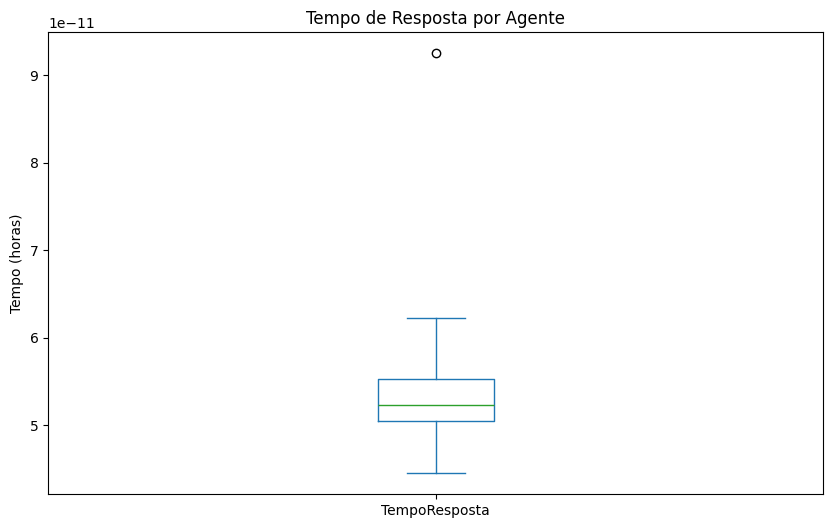

In [ ]:
# Certifique-se de que a coluna 'DtCriacao' esteja no formato de data
ouvidoria['DtCriacao'] = pd.to_datetime(ouvidoria['DtCriacao'])

# Calcular o tempo de resposta (diferença entre o momento da criação e o momento atual)
# Para simplificação, estamos considerando o tempo desde a primeira entrada.
ouvidoria['TempoResposta'] = (ouvidoria['DtCriacao'] - ouvidoria['DtCriacao'].min()).dt.total_seconds() / 3600  # Tempo em horas

# Agrupar os tempos de resposta por agente
tempo_resposta_agente = ouvidoria.groupby(['SigAgente'])['TempoResposta'].mean()

# Plotando Boxplot para visualizar a distribuição do tempo de resposta por agente
plt.figure(figsize=(10,6))
tempo_resposta_agente.plot(kind='box')
plt.title('Tempo de Resposta por Agente')
plt.ylabel('Tempo (horas)')
plt.show()


Percentual de Reclamações por Município no Top 10:
NomMunicipio
São Paulo         49.982799
Salvador          10.213361
Belo Horizonte     7.692940
Fortaleza          5.570237
Limeira            4.829788
Recife             4.739524
Guarujá            4.487523
Cuiabá             4.407659
Itanhaém           4.111629
Campinas           3.964541
Name: QtdReclamacoesRecebidas, dtype: float64


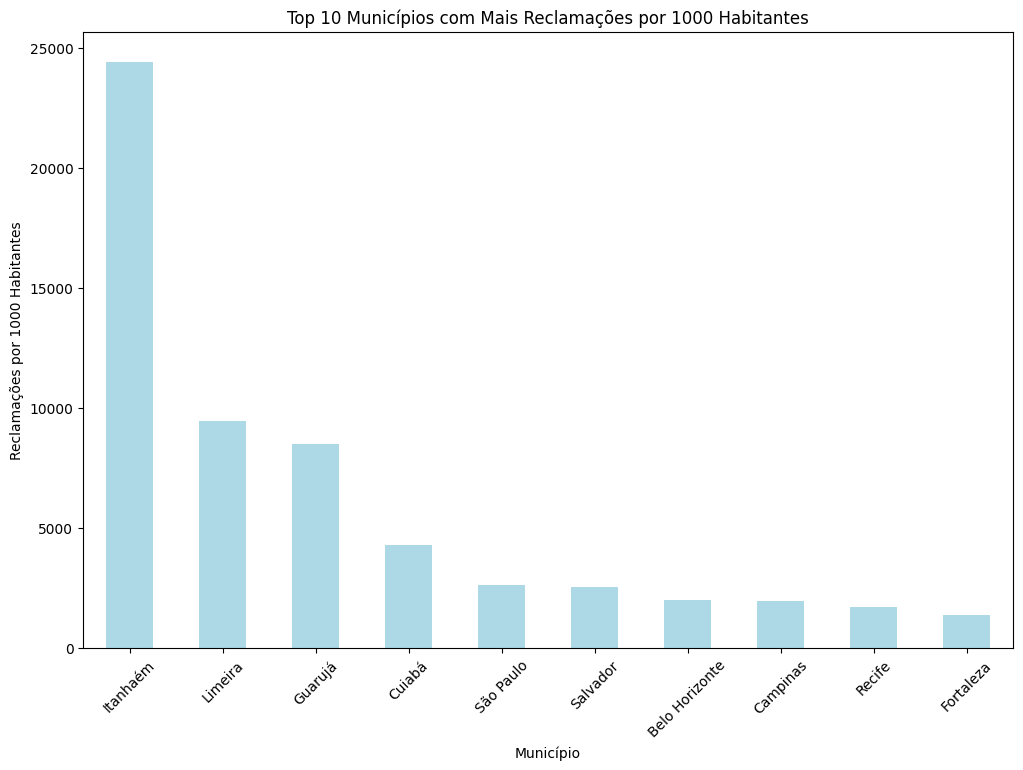

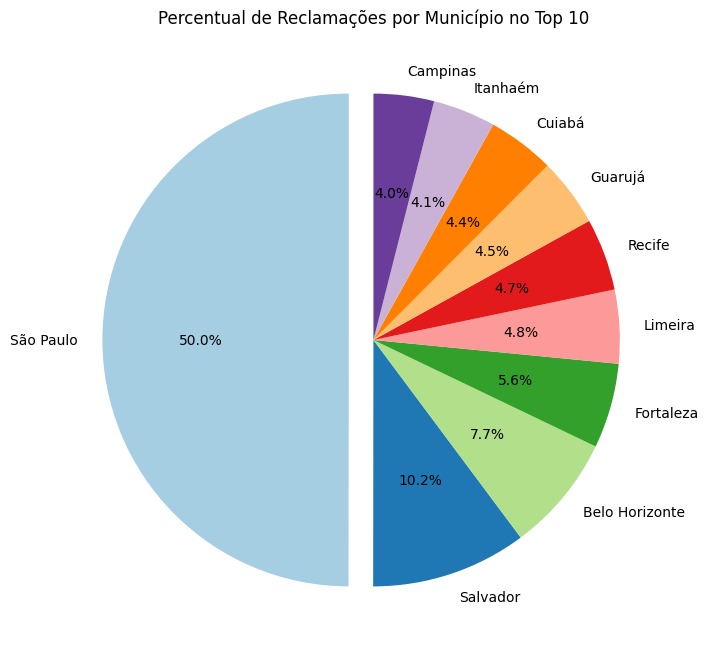

In [ ]:
# População estimada das cidades do Top 10
populacao_cidades = {
    "São Paulo": 11451245,
    "Salvador": 2418005,
    "Belo Horizonte": 2315560,
    "Fortaleza": 2428678,
    "Limeira": 308482,
    "Recife": 1653461,
    "Guarujá": 319149,
    "Cuiabá": 618124,
    "Itanhaém": 101816,
    "Campinas": 1223237,
}

# 1. Calcular total de reclamações por município
reclamacoes_total = reclamacoes.groupby('NomMunicipio')['QtdReclamacoesRecebidas'].sum()

# 2. Filtrando para os 10 municípios com mais reclamações
top_10_reclamacoes = reclamacoes_total.loc[reclamacoes_total.index.isin(populacao_cidades.keys())].sort_values(ascending=False)

# 3. Calcular reclamações por 1000 habitantes
reclamacoes['ReclamacoesPerCapita'] = (
    reclamacoes.groupby('NomMunicipio')['QtdReclamacoesRecebidas'].transform('sum')
    / reclamacoes['NomMunicipio'].map(populacao_cidades) * 1000
)

# Agrupar por município e calcular a média de reclamações por 1000 habitantes
reclamacoes_per_capita = reclamacoes.groupby('NomMunicipio')['ReclamacoesPerCapita'].mean()

# Filtrar para o Top 10
top_10_reclamacoes_per_capita = reclamacoes_per_capita.loc[reclamacoes_per_capita.index.isin(top_10_reclamacoes.index)]

# 4. Cálculo de Percentual de Reclamações no Top 10
total_reclamacoes_top_10_sum = top_10_reclamacoes.sum()

# Calculando o percentual de cada cidade no total do Top 10
percentual_reclamacoes_top_10 = (top_10_reclamacoes / total_reclamacoes_top_10_sum) * 100

# Exibindo o percentual de reclamações de cada cidade do top 10
print("\nPercentual de Reclamações por Município no Top 10:")
print(percentual_reclamacoes_top_10.sort_values(ascending=False))

# 6. Plotando gráfico de reclamações por 1000 habitantes
plt.figure(figsize=(12, 8))
top_10_reclamacoes_per_capita.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Top 10 Municípios com Mais Reclamações por 1000 Habitantes')
plt.xlabel('Município')
plt.ylabel('Reclamações por 1000 Habitantes')
plt.xticks(rotation=45)
plt.show()

# 7. Gráfico de pizza para o percentual de reclamações por município
# Vamos destacar o município com maior percentual separando o segmento
explode = [0.1 if municipio == percentual_reclamacoes_top_10.idxmax() else 0 for municipio in percentual_reclamacoes_top_10.index]

plt.figure(figsize=(8, 8))
plt.pie(percentual_reclamacoes_top_10, labels=percentual_reclamacoes_top_10.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=plt.cm.Paired.colors)
plt.title('Percentual de Reclamações por Município no Top 10')
plt.show()


Correlação entre interrupções e reclamações por município: 0.2199962106858375


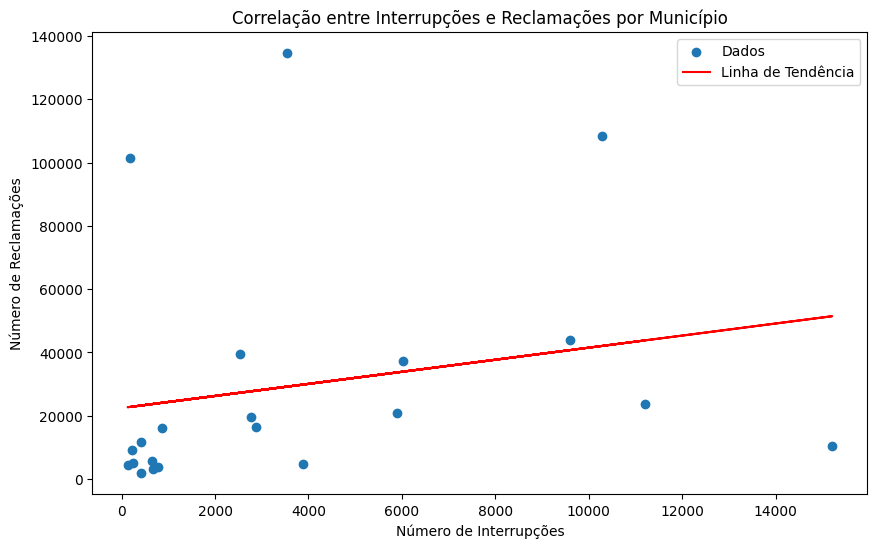

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Agrupar por município e somar as interrupções e reclamações
interrupcoes_reclamacoes_municipio = pd.DataFrame({
    'Interrupções': interrupcoes.groupby('DscConjuntoUnidadeConsumidora')['NumUnidadeConsumidora'].count(),
    'Reclamações': reclamacoes.groupby('NomMunicipio')['QtdReclamacoesRecebidas'].sum()
})

# Remover os municípios que não aparecem em ambos os conjuntos de dados
interrupcoes_reclamacoes_municipio = interrupcoes_reclamacoes_municipio.dropna()

# Calcular a correlação
correlacao = interrupcoes_reclamacoes_municipio['Interrupções'].corr(interrupcoes_reclamacoes_municipio['Reclamações'])

print(f"Correlação entre interrupções e reclamações por município: {correlacao}")

# Gráfico de dispersão para visualizar a correlação
plt.figure(figsize=(10, 6))
plt.scatter(interrupcoes_reclamacoes_municipio['Interrupções'], interrupcoes_reclamacoes_municipio['Reclamações'], label='Dados')

# Adicionar linha de tendência
m, b = np.polyfit(interrupcoes_reclamacoes_municipio['Interrupções'], interrupcoes_reclamacoes_municipio['Reclamações'], 1)
plt.plot(interrupcoes_reclamacoes_municipio['Interrupções'], m*interrupcoes_reclamacoes_municipio['Interrupções'] + b, color='red', label='Linha de Tendência')

plt.title('Correlação entre Interrupções e Reclamações por Município')
plt.xlabel('Número de Interrupções')
plt.ylabel('Número de Reclamações')
plt.legend()
plt.show()


In [ ]:
# Correlação entre qualidade e satisfação
qualidade_satisfacao = iasc[['MdaIndicadorQualidade', 'MdaIndicadorSatisfacao', 'MdaIndicadorConfianca']].corr()
print(qualidade_satisfacao)


                        MdaIndicadorQualidade  MdaIndicadorSatisfacao  \
MdaIndicadorQualidade                1.000000                0.761468   
MdaIndicadorSatisfacao               0.761468                1.000000   
MdaIndicadorConfianca                0.930348                0.781591   

                        MdaIndicadorConfianca  
MdaIndicadorQualidade                0.930348  
MdaIndicadorSatisfacao               0.781591  
MdaIndicadorConfianca                1.000000  


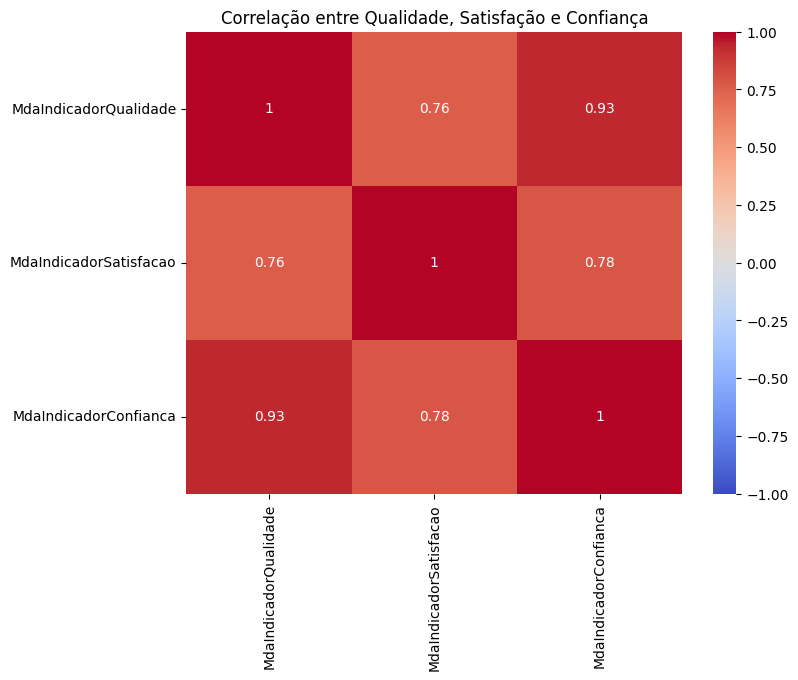

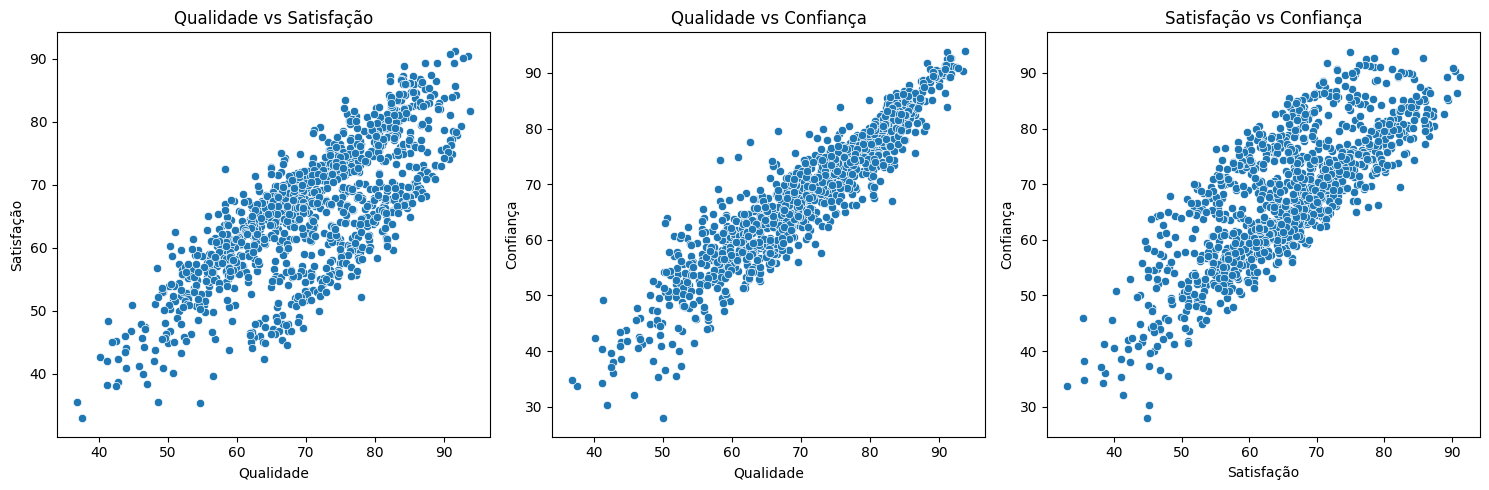

In [ ]:


# Calcular a correlação entre os indicadores
qualidade_satisfacao = iasc[['MdaIndicadorQualidade', 'MdaIndicadorSatisfacao', 'MdaIndicadorConfianca']].corr()

# Plotar o mapa de calor da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(qualidade_satisfacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Qualidade, Satisfação e Confiança')
plt.show()

# Gráficos de dispersão para visualizar a correlação
plt.figure(figsize=(15, 5))

# Qualidade vs Satisfação
plt.subplot(1, 3, 1)
sns.scatterplot(x=iasc['MdaIndicadorQualidade'], y=iasc['MdaIndicadorSatisfacao'])
plt.title('Qualidade vs Satisfação')
plt.xlabel('Qualidade')
plt.ylabel('Satisfação')

# Qualidade vs Confiança
plt.subplot(1, 3, 2)
sns.scatterplot(x=iasc['MdaIndicadorQualidade'], y=iasc['MdaIndicadorConfianca'])
plt.title('Qualidade vs Confiança')
plt.xlabel('Qualidade')
plt.ylabel('Confiança')

# Satisfação vs Confiança
plt.subplot(1, 3, 3)
sns.scatterplot(x=iasc['MdaIndicadorSatisfacao'], y=iasc['MdaIndicadorConfianca'])
plt.title('Satisfação vs Confiança')
plt.xlabel('Satisfação')
plt.ylabel('Confiança')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import datetime as dt

df = pd.read_excel("interrupcoes-energia-eletrica-2023.xlsx")

# Converter colunas de datas
df['DatInicioInterrupcao'] = pd.to_datetime(df['DatInicioInterrupcao'])
df['DatFimInterrupcao'] = pd.to_datetime(df['DatFimInterrupcao'])

# Calcular duração da interrupção (em minutos)
df['DuracaoMinutos'] = (df['DatFimInterrupcao'] - df['DatInicioInterrupcao']).dt.total_seconds() / 60

# Selecionar colunas relevantes
features = ['NumNivelTensao', 'NumConsumidorConjunto', 'NumAno']  # Colunas numéricas

# One-hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=['DscTipoInterrupcao'], drop_first=True)

# Adicionar as novas colunas geradas para 'DscTipoInterrupcao' em features
features += [col for col in df.columns if col.startswith('DscTipoInterrupcao')]

# Remover dados faltantes
df = df.dropna(subset=features + ['DuracaoMinutos'])

# Dividir os dados em treino e teste
X = df[features]
y = df['DuracaoMinutos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Erro Médio Absoluto: {mae:.2f} minutos")


Erro Médio Absoluto: 374.08 minutos
